<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/pose_orientation_accel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [0]:
input_mat = io.loadmat('/content/gdrive/My Drive/data/kalmanfilter/source/11.ARS/ArsAccel.mat')

In [0]:
print(input_mat)

In [0]:
def get_accel(i):
    ax = input_mat['fx'][i][0]  # input_mat['fx'] : (41500, 1)
    ay = input_mat['fy'][i][0]  # input_mat['fy'] : (41500, 1)
    az = input_mat['fz'][i][0]  # input_mat['fz'] : (41500, 1)
    return ax, ay, az

움직이는 속도가 충분히 느리거나 속도의 크기와 방향이 빠르게 변하지 않는다면 근사식으로 만든 후, 아래와 같은 함수로 만들 수 있습니다. 기존과 달리 (sin)^-1 대신 (tan)^-1 함수를 사용합니다.

매개변수 : ax,ay,az(가속도)
반환값 : 롤각, 피치각


In [0]:
def accel2euler(ax, ay, az, phi, the, psi):
    """Calculate Euler angle (Pose Orientation)."""
    phi = np.arctan2(ay, az)
    the = np.arctan2(ax, np.sqrt(ay**2 + az**2))
    psi = psi
    return phi, the, psi

In [0]:
# Input parameters
n_samples = 41500
dt = 0.01

In [0]:
time = np.arange(n_samples) * dt
phi_save = np.zeros(n_samples)
the_save = np.zeros(n_samples)
psi_save = np.zeros(n_samples)

In [0]:
phi, the, psi = 0, 0, 0
for i in range(n_samples):
    ax, ay, az = get_accel(i)
    phi, the, psi = accel2euler(ax,ay,az,phi,the,psi)
    phi_save[i] = np.rad2deg(phi)
    the_save[i] = np.rad2deg(the)
    psi_save[i] = np.rad2deg(psi)

Text(0, 0.5, 'Yaw ($\\psi$) angle [deg]')

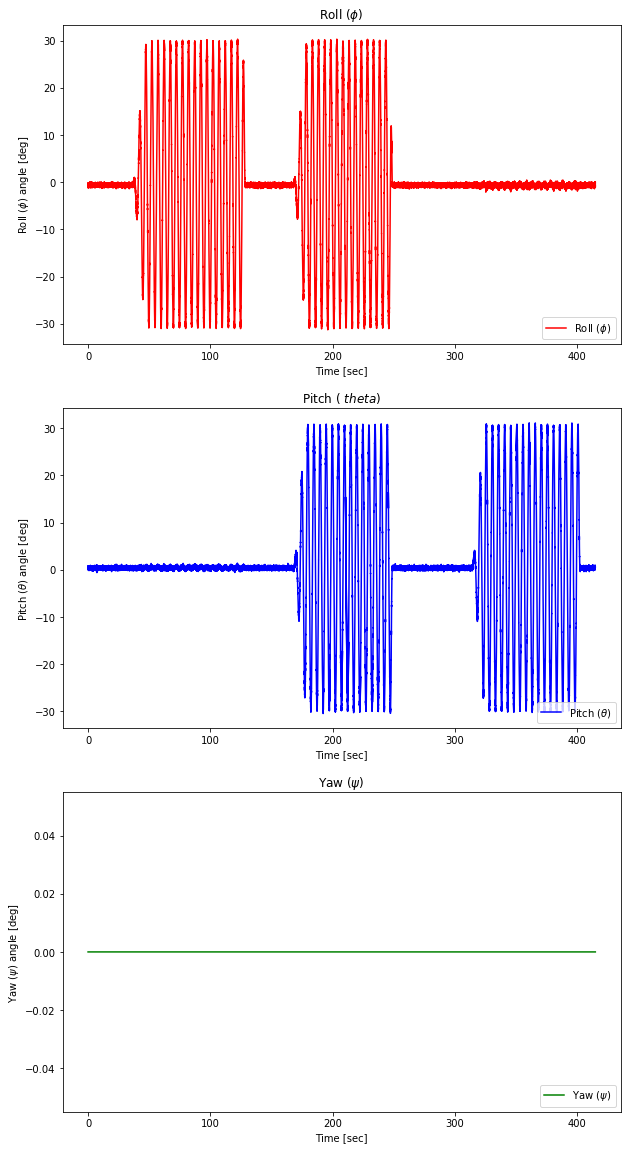

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

plt.subplot(3,1,1)
plt.plot(time,phi_save,'r',label='Roll ($\\phi$)',markersize=0.2)
plt.legend(loc='lower right')
plt.title('Roll ($\\phi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Roll ($\phi$) angle [deg]')

plt.subplot(3,1,2)
plt.plot(time,the_save,'b',label='Pitch ($\\theta$)',markersize=0.2)
plt.legend(loc='lower right')
plt.title('Pitch ($\\ theta$)')
plt.xlabel('Time [sec]')
plt.ylabel('Pitch ($\\theta$) angle [deg]')

plt.subplot(3,1,3)
plt.plot(time,psi_save,'g',label='Yaw ($\\psi$)',markersize=0.2)
plt.legend(loc='lower right')
plt.title('Yaw ($\\psi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Yaw ($\\psi$) angle [deg]')